In [ ]:
import requests
import pandas as pd

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#I^3#r^0#p^1#f^0#t^H4sIAAAAAAAAAOVYa2wURRzv9aUFCiY0gtjAuSgEyu7N7r033Mn1RWuhLdwVKqJkH7PX7e3tXnd22x4BU6tUJbEJiImPqCXGSNJEJfoBITEl4a0xBklMQDAQasQmyiPIB6I4ty2lrQQO7tQm7pfNzPyfv/k/ZgZ0FRYt7qnpuVZseyC3rwt05dps9FRQVFhQNj0vd05BDhhDYOvrerwrvzvv56WIiysJdjVECU1F0N4ZV1TEWpMBwtRVVuOQjFiVi0PEGgIbDq1cwTIUYBO6ZmiCphD22soA4RLdwOUTvT4AXG6PB0+qN0VGtADh9fs9PsnLMD4B+l0SxOsImbBWRQanGgGCAYybBE6S9kQYhnUDFrgpF+NdR9jXQB3JmopJKEAELWtZi1cfY+qdLeUQgrqBhRDB2lB1uCFUW1lVH1nqGCMrOAJD2OAME40fVWgitK/hFBPeWQ2yqNmwKQgQIcIRHNYwXigbumnMfZhvIe13eSW35HHxUJJ8vBtkBcpqTY9zxp3tSM3IIilZpCxUDdlI3g1RjAbfCgVjZFSPRdRW2lO/VSanyJIM9QBRVR56OtTYSARXQlXlajhERslweTPpc3ICz/mBSDKSy8XzwD2iYVjMCL4TVFRoqiin0EL2es0oh9hcOBEU1xhQMFGD2qCHJCNlyiidNwLAKHj0utRuDm+fabSoqQ2FcYyA3RreHfpRbsPQZd404KiEiQsWNgGCSyRkkZi4aAXhSNx0ogDRYhgJ1uHo6OigOpyUpkcdDAC0o3nlirDQAuMcMUorB1K5flcGUrZcEXB+Yh7WSCawLZ04SLEBapQIupx+p58ZwX28WcGJs3+bGOOzY3wqZCs1vLQX1xbJ6XKKghdKWUmN4Eh0OlJ2QJ5LknFOj0EjoXACJAUcZ2Yc6rLIOt0S4/RJkBQ9fol0+SWJ5N2ih6QlCAGEPC/4ff+LDEk3xsNQ0KGR1SDPOMDbQa26saFF12ua+bq1Uv0qVBEFTKLsqWh1e1tNrG25UlcdaY62xkxXIN00uK3zFYqMkYlg/f8AAKlczwCEGg0ZUMzIvbCgJWCjpshCcnJtsFMXGzndSJabSTwOQ0XBv4xcDSUStdkt1Rk7mW6VuD+Hs9+b/uW+dFuvUCpiJ5dXKX6EBXAJmUp1HkrQ4g6Nw0eO1NQGy2J7KtfTIXTwZpKKmhAZ2BIRH/nSZpJxFadwExPTZxlukdiJ9FnwdUI0BeO+FFm9mMJoytEWA92Tzs5MQOFNJZY+iwg5JaMQlfGtYlIFKPZ02GVZHL4OUJbfFGoXKB0izdTxTYhqSB2SI1oMqvjkYeiaokB9DZ1xzY3HTYPjFTjZim8WapHM3f5YlN9tO/Wf+YXP1gztcbsy7B6CdfDZMNk6SNZa5j1cehzjn16COdZHd9uOgW7boVybDVQCki4DiwrzmvLzphEIFx0KcarIa52UzEkUrncqZ5g6pGIwmeBkPXdmzldtOUu6ptQ4Pt26vrss0prMeXDMC1Dfs2D26BtQUR49dcyDECi9tVJAz5hVzLiBk/Yw+Afc68D8W6v59MP5Jb3hguZfryzi/NvP9K89+/53/IVdpaB4lMhmK8jB4ZpT+Mzs2IFPrh85dLhql3zcdnDzyW3V5x/58bKyrefGxTeovUMFwW+ez38v98mXn3vhwGs7IgOOV899vuT86djOhUVbidhPPZdXXfG++/vLe2b2Eos3Jy/9uWng6OA+MlbyZtE75cuaey4wH99Yv69t4FTb7uK+7rPkyQVh3+DcH15p30me2P/SF1uGBq7vn94r1m/f/9G3p468vuP8ixeXK1NWnz6zaePXTf0cuae76ej1WfqsL+NDD9X1Bc61fahc/X7GxsfefnT3tONz5Lprh0sqK1BV2+Av9ILkZ1N3bVjYP6+UOLh3fUkFfXpoxxDZOpdoLR2cP+OtY3O29F/944OuZb81zVvce2Kj0DP90qEnhvf0Ly+iYVebEwAA"# eBay Sandbox Browse API URL (change 'drone' to any search term)
query = "headphone"
limit = 40
url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    if items:
        for idx, item in enumerate(items, start=1):
            title = item.get("title", "No Title")
            price = item.get("price", {}).get("value", "N/A")
            currency = item.get("price", {}).get("currency", "USD")
            image_url = item.get("image", {}).get("imageUrl", "No Image")

            print(f"{idx}. {title}")
            print(f"   Price: {price} {currency}")
            print(f"   Image: {image_url}\n")
    else:
        print("No items found.")
else:
    print(f"Error {response.status_code}: {response.text}")


1. Premium Wireless Earbuds - Miami Edition
   Price: 49.99 USD
   Image: No Image

2. AirPods 2nd Generation with Charging Case - White
   Price: 55.00 USD
   Image: http://i.ebayimg.sandbox.ebay.com/images/g/pSAAAOSw~qJnxqul/s-l225.jpg



In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "headphone"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    headphones = {}

    if items:
        for idx, item in enumerate(items, start=1):
            headphones[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
headphones

{1: {'title': 'Premium Wireless Earbuds - Miami Edition',
  'price': '49.99 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110576315189|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Premium-Wireless-Earbuds-Miami-Edition/110576315189?src=urllib&_skw=headphone&hash=item19bedcab35:i:110576315189'},
 2: {'title': 'AirPods 2nd Generation with Charging Case - White',
  'price': '55.00 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/pSAAAOSw~qJnxqul/s-l225.jpg',
  'item_id': 'v1|110575175541|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/AirPods-2nd-Generation-with-Charging-Case-White/110575175541?src=urllib&_skw=headphone&hash=item19becb4775:g:pSAAAOSw~qJnxqul'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "headphone"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"


headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    tv = {}

    if items:
        for idx, item in enumerate(items, start=1):
            tv[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
tv

{1: {'title': 'Premium Wireless Earbuds - Miami Edition',
  'price': '49.99 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110576315189|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Premium-Wireless-Earbuds-Miami-Edition/110576315189?src=urllib&_skw=headphone&hash=item19bedcab35:i:110576315189'},
 2: {'title': 'AirPods 2nd Generation with Charging Case - White',
  'price': '55.00 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/pSAAAOSw~qJnxqul/s-l225.jpg',
  'item_id': 'v1|110575175541|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/AirPods-2nd-Generation-with-Charging-Case-White/110575175541?src=urllib&_skw=headphone&hash=item19becb4775:g:pSAAAOSw~qJnxqul'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "fan"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    fan = {}

    if items:
        for idx, item in enumerate(items, start=1):
            fan[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
fan

{1: {'title': 'Radiator Cooling Fan Assembly for BMW 3 Series 325i 328i 330i E46 17117510617',
  'price': '108.14 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110577834267|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Radiator-Cooling-Fan-Assembly-for-BMW-3-Series-325i-328i-330i-E46-17117510617/110577834267?src=urllib&_skw=fan&hash=item19bef3d91b:i:110577834267'},
 2: {'title': '130000RPM Turbo Blower Jet Fan Violent Turbofan Brushless Motor Rechargeable USA',
  'price': '22.69 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/8rkAAOSw~ItntpY4/s-l225.jpg',
  'item_id': 'v1|110571451126|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/130000RPM-Turbo-Blower-Jet-Fan-Violent-Turbofan-Brushless-Motor-Rechargeable-USA/110571451126?src=urllib&_skw=fan&hash=item19be9272f6:g:8rkAAOSw~ItntpY4'},
 3: {'title': '42" Stainless Steel LED Chandelier 3-Color Light Remote Reversible Ceiling Fans',
  'price': '149.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/i

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "dishwasher"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    dishwasher = {}

    if items:
        for idx, item in enumerate(items, start=1):
            dishwasher[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
dishwasher

{1: {'title': 'Non Stick Cast Iron Frying Diamond pattern Pans Dishwasher Removable Pan 8-12in',
  'price': '44.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/ZAsAAOSwaTlnPVc~/s-l225.jpg',
  'item_id': 'v1|110576811937|410109992721',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Non-Stick-Cast-Iron-Frying-Diamond-pattern-Pans-Dishwasher-Removable-Pan-8-12in/110576811937?src=urllib&_skw=dishwasher&hash=item19bee43fa1:g:ZAsAAOSwaTlnPVc~'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "air conditioner"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    air_conditioner = {}

    if items:
        for idx, item in enumerate(items, start=1):
           air_conditioner[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
air_conditioner

{1: {'title': 'FOGATTI Non-Ducted RV Air Conditioner 15000BTU RV Rooftop AC Unit for Cooling',
  'price': '879.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/rmMAAOSwsiZmSAek/s-l225.jpg',
  'item_id': 'v1|110577337050|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/FOGATTI-Non-Ducted-RV-Air-Conditioner-15000BTU-RV-Rooftop-AC-Unit-for-Cooling/110577337050?src=urllib&_skw=air+conditioner&hash=item19beec42da:g:rmMAAOSwsiZmSAek'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "printer"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    printer = {}

    if items:
        for idx, item in enumerate(items, start=1):
           printer[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
printer

{1: {'title': 'NIIMBOT D110-M Label Maker Machine Thermal Bluetooth Portable Label Printer',
  'price': '19.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/AIoAAOSwLHpn08GE/s-l225.jpg',
  'item_id': 'v1|110577326431|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/NIIMBOT-D110-M-Label-Maker-Machine-Thermal-Bluetooth-Portable-Label-Printer/110577326431?src=urllib&_skw=printer&hash=item19beec195f:g:AIoAAOSwLHpn08GE'},
 2: {'title': '4PK High Pages 923 923e Ink Cartridges Use for HP Printers OfficeJet Pro 8123',
  'price': '49.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/UwgAAOSwDKRnypcF/s-l225.jpg',
  'item_id': 'v1|110576230731|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/4PK-High-Pages-923-923e-Ink-Cartridges-Use-for-HP-Printers-OfficeJet-Pro-8123/110576230731?src=urllib&_skw=printer&hash=item19bedb614b:g:UwgAAOSwDKRnypcF'},
 3: {'title': 'Presale Sovol SV06Plus ACE 3D Printer Open Source Stable Z-axis 500mm/s Printing',
  'price': '

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "Dell"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    dell = {}

    if items:
        for idx, item in enumerate(items, start=1):
           dell[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
dell

{1: {'title': 'For Dell OEM Inspiron 15 3510 3515 15.6" LCD LED WXGAHD Widescreen 78KFY new',
  'price': '51.00 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/keEAAOSwaXpnfj3E/s-l225.jpg',
  'item_id': 'v1|110576811587|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/For-Dell-OEM-Inspiron-15-3510-3515-15-6-LCD-LED-WXGAHD-Widescreen-78KFY-new/110576811587?src=urllib&_skw=Dell&hash=item19bee43e43:g:keEAAOSwaXpnfj3E'},
 2: {'title': 'SKOWER 42Wh WDX0R Battery For Dell Inspiron 13 5378 5368 7378 5568 15 5567 WDXOR',
  'price': '15.99 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/PcYAAOSwskNnypdq/s-l225.jpg',
  'item_id': 'v1|110576236888|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/SKOWER-42Wh-WDX0R-Battery-For-Dell-Inspiron-13-5378-5368-7378-5568-15-5567-WDXOR/110576236888?src=urllib&_skw=Dell&hash=item19bedb7958:g:PcYAAOSwskNnypdq'},
 3: {'title': 'SKOWER 42Wh WDX0R Battery For Dell Inspiron 13 5378 5368 7378 5568 15 5567 WDXOR',
  'price': 

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="
query = "Lenovo"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    lenovo = {}

    if items:
        for idx, item in enumerate(items, start=1):
           lenovo[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
lenovo

{1: {'title': 'New Open Box Lenovo ThinkPad P16 Gen 2 16" Intel i9-13950HX 32GB RAM 1TB SSD',
  'price': '98.17 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/3yEAAOSwzbxnbiM3/s-l225.jpg',
  'item_id': 'v1|110571819785|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/New-Open-Box-Lenovo-ThinkPad-P16-Gen-2-16-Intel-i9-13950HX-32GB-RAM-1TB-SSD/110571819785?src=urllib&_skw=Lenovo&hash=item19be981309:g:3yEAAOSwzbxnbiM3'},
 2: {'title': '5B21J05043 For Lenovo 100e Chromebook Gen 3 Motherboard N4500 4G 64G EMMC',
  'price': '135.98 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/ij4AAOSw261l6EYr/s-l225.jpg',
  'item_id': 'v1|110572513070|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/5B21J05043-For-Lenovo-100e-Chromebook-Gen-3-Motherboard-N4500-4G-64G-EMMC/110572513070?src=urllib&_skw=Lenovo&hash=item19bea2a72e:g:ij4AAOSw261l6EYr'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="
query = "Macbook"
limit = 20

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    macbook = {}

    if items:
        for idx, item in enumerate(items, start=1):
           macbook[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
macbook

{1: {'title': 'Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW',
  'price': '500.00 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110577910472|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Apple-MacBook-Pro-MB990LL-A-13-3-in-Notebook-NEW/110577910472?src=urllib&_skw=Macbook&hash=item19bef502c8:i:110577910472'},
 2: {'title': 'Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW',
  'price': '500.00 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110577732801|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Apple-MacBook-Pro-MB990LL-A-13-3-in-Notebook-NEW/110577732801?src=urllib&_skw=Macbook&hash=item19bef24cc1:i:110577732801'},
 3: {'title': 'Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW',
  'price': '500.00 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110577681056|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Apple-MacBook-Pro-MB990LL-A-13-3-in-Notebook-NEW/110577681056?src=urllib&_skw=Macbook&hash=item19bef182a0:i:110577681056'},
 4: {'title': 'Old Simple

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="
query = "keyboard"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    keyboard = {}

    if items:
        for idx, item in enumerate(items, start=1):
           keyboard[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
keyboard

{1: {'title': 'Ultra Slim Wireless Keyboard & Mouse Combo, Mini 2.4G for USB Devices',
  'price': '16.20 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/a8YAAOSwwetn0~y~/s-l225.jpg',
  'item_id': 'v1|110577335521|410109997391',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Ultra-Slim-Wireless-Keyboard-Mouse-Combo-Mini-2-4G-for-USB-Devices/110577335521?src=urllib&_skw=keyboard&hash=item19beec3ce1:g:a8YAAOSwwetn0~y~'},
 2: {'title': 'Urao Tablet 10.1" Android 14 Octa-Core Tablets,10GB+64GB With Keyboard/Mouse IPS',
  'price': '157.98 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/m0YAAOSwo~dnwS3U/s-l225.jpg',
  'item_id': 'v1|110573618619|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Urao-Tablet-10-1-Android-14-Octa-Core-Tablets-10GB-64GB-With-Keyboard-Mouse-IPS/110573618619?src=urllib&_skw=keyboard&hash=item19beb385bb:g:m0YAAOSwo~dnwS3U'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="
query = "mouse"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    mouse = {}

    if items:
        for idx, item in enumerate(items, start=1):
           mouse[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
mouse

{1: {'title': 'Ultra Slim Wireless Keyboard & Mouse Combo, Mini 2.4G for USB Devices',
  'price': '16.20 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/a8YAAOSwwetn0~y~/s-l225.jpg',
  'item_id': 'v1|110577335521|410109997391',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Ultra-Slim-Wireless-Keyboard-Mouse-Combo-Mini-2-4G-for-USB-Devices/110577335521?src=urllib&_skw=mouse&hash=item19beec3ce1:g:a8YAAOSwwetn0~y~'},
 2: {'title': 'Urao Tablet 10.1" Android 14 Octa-Core Tablets,10GB+64GB With Keyboard/Mouse IPS',
  'price': '157.98 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/m0YAAOSwo~dnwS3U/s-l225.jpg',
  'item_id': 'v1|110573618619|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Urao-Tablet-10-1-Android-14-Octa-Core-Tablets-10GB-64GB-With-Keyboard-Mouse-IPS/110573618619?src=urllib&_skw=mouse&hash=item19beb385bb:g:m0YAAOSwo~dnwS3U'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "motherboard"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    mb = {}

    if items:
        for idx, item in enumerate(items, start=1):
          mb[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
mb

{1: {'title': '5B21J05043 For Lenovo 100e Chromebook Gen 3 Motherboard N4500 4G 64G EMMC',
  'price': '135.98 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/ij4AAOSw261l6EYr/s-l225.jpg',
  'item_id': 'v1|110572513070|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/5B21J05043-For-Lenovo-100e-Chromebook-Gen-3-Motherboard-N4500-4G-64G-EMMC/110572513070?src=urllib&_skw=motherboard&hash=item19bea2a72e:g:ij4AAOSw261l6EYr'},
 2: {'title': 'For ASUS FX505D FX505DU FX505DV laptop Motherboard R5 R7 RTX2060-6G mainboard',
  'price': '193.80 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/SOIAAOSwDyBneOAX/s-l225.jpg',
  'item_id': 'v1|110574088460|410109983947',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/For-ASUS-FX505D-FX505DU-FX505DV-laptop-Motherboard-R5-R7-RTX2060-6G-mainboard/110574088460?src=urllib&_skw=motherboard&hash=item19bebab10c:g:SOIAAOSwDyBneOAX'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="
query = "airpod"
limit = 10

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    airpod = {}

    if items:
        for idx, item in enumerate(items, start=1):
          airpod[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
airpod

{1: {'title': 'AirPods 2nd Generation with Charging Case - White',
  'price': '55.00 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/pSAAAOSw~qJnxqul/s-l225.jpg',
  'item_id': 'v1|110575175541|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/AirPods-2nd-Generation-with-Charging-Case-White/110575175541?src=urllib&_skw=airpod&hash=item19becb4775:g:pSAAAOSw~qJnxqul'}}

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "iphone"
limit = 20

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    iphone = {}

    if items:
        for idx, item in enumerate(items, start=1):
          iphone[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
iphone

{1: {'title': 'Iphone 25 Pro e',
  'price': '97.50 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/J54AAOSw9blnvGf6/s-l225.jpg',
  'item_id': 'v1|110572565705|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Iphone-25-Pro-e/110572565705?src=urllib&_skw=iphone&hash=item19bea374c9:g:J54AAOSw9blnvGf6'},
 2: {'title': '3X For iPhone 16 15 14 13 12 11 Pro Max  Privacy Tempered Glass Screen Protector',
  'price': '5.95 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/jrIAAOSwVIFmXPg4/s-l225.jpg',
  'item_id': 'v1|110576814332|410109994998',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/3X-For-iPhone-16-15-14-13-12-11-Pro-Max-Privacy-Tempered-Glass-Screen-Protector/110576814332?src=urllib&_skw=iphone&hash=item19bee448fc:g:jrIAAOSwVIFmXPg4'},
 3: {'title': 'My Test IPhone',
  'price': '202.70 USD',
  'image_url': 'No Image',
  'item_id': 'v1|110571452336|410109972574',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/My-Test-IPhone/110571452336?src=urllib&_

In [ ]:
EBAY_OAUTH_TOKEN = "v^1.1#i^1#p^1#f^0#I^3#r^0#t^H4sIAAAAAAAAAOVYe2xTVRhv9wAmTsYEUYJaLxjR2dtz7+269roWu5XRAntA65hksNzHud3dbu/t7j13W/FVF3kICAnRGJXIFP+ABBI1RtHoH0ZFAtGEh8Yw8A81aNQhBNEYhXjaPegmgUIbXWL/ae453/ed7/c73+OcA5KTSu5bF1z3e6l1ckF/EiQLrFZqKiiZVFxxU2HB7GILyBCw9ifnJYv6Cn+oNriYEmeXQyOuqQa09cYU1WDTg17C1FVW4wzZYFUuBg0WCWzYX7+UpUnAxnUNaYKmELZQwEtQkgQppyhKQHB6AO/Co+qIzYjmJXgPI7o4mnZVMYAWKA7PG4YJQ6qBOBV5CRrQlXbA2KmqCKBZimEZN+lkKlcStmaoG7KmYhESEL60u2xaV8/w9cqucoYBdYSNEL6Qvy7c6A8FFjZEqh0ZtnzDPIQRh0xj7FetJkJbM6eY8MrLGGlpNmwKAjQMwuEbWmGsUdY/4sx1uJ+mGgIRUC5GoqqqKimRgXmhsk7TYxy6sh+pEVm0S2lRFqpIRomrMYrZ4DuggIa/GrCJUMCW+ltmcoosyVD3Egtr/A/7m5oIXz1UVS7IGfaoPVzTYncznMBzHiDaacnp5HlQObzCkJlhfsctUaupopxiy7A1aKgGYnfheFJABilYqFFt1P0SSrmSKeccIY92r0zt5tD2mahdTW0ojGEGbOnPq1M/qo2QLvMmgqMWxk+kufESXDwui8T4yXQQDsdNr+El2hGKsw5HT08P2cOQmh510ABQjpb6pWGhHcZwlo3Iyqlcv7qCXU5DEXBQYR0WJeLYl14cpNgBNUr4nIyH8dDDvI91yzd+9B8DGZgdY1MhX6nBQ7eHp5y05MalRoRCPlLDNxydjpQfkOcS9hind0IUVzgB2gUcZ2YM6rLIMpUSzbglaBddHsnu9EiSna8UXXZKghBAyPOCx/2/yJBsYzwMBR2ifAZ57gHeDULqmsZ2XQ+28EtWSA3LjNoooOMVi6N13V3Bzq5FypK6SEu0o9N0erNNg8uCr1VkzEwEr59/AlK5ngsJQc1AUMwJXljQ4rBJU2QhMbE2mNHFJk5HiRozgb/DUFHwX05Q/fF4KK+lOneQ2VaJ6wOc9970b/ely6IyUhE7sVCl9A1sgIvLZKrzkIIWc2gcPnKkhtrSHqdy3ZaNoIM3E2TUhAbCnoj4yJe1koyrOImbmJi9ylCLxCCyV8H3CdEU0HUtlO7FJGZTjrYj45rW7M2FFN5UOrNXESGn5BSiMr5VTKgAxUiHIMvi0HWATOMmjW6B1KGhmTq+CZGNqUNyROuEKj55IF1TFKg3UznX3FjMRByvwIlWfPNQi2Tusseioj7rif8OF1XlpPGd00W5c8ImpA8+bROtg+StZV7Dpccx9u3FZ0n/qD7rQdBn3V9gtYIAsFMV4N5JhQ8VFd5IGLjokAanirzWS8qcROJ6p3LI1CHZCRNxTtYLbrYc6rLcn7wh6Hh9Y2tfRaQjYZmS8QTUvwrcOvoIVFJITc14EQJzLs0UU9NmldKVgKGqAE0xjHslmHtptoi6pWhG8MTF576elgjwZbOcj3yzu3yPWVwFSkeFrNZiC45XS+xsd/2PhYNlx1BZ13slF+q+PLaIu3P9gelC3ws7mNW/9VjWOw7eXt67aMPpBz9D5uPPz/t07exvo9ULt9ecfPPMLyvOR6S600t2/IyO3vX2wLMb/vxiV03B0dZz594hNk154vjx8w0Xjk7uG9z52scnZw7sGnjg5d0f/nX47GZn4NSBZxYo99zxPdyyd7W+7SPqyOGNM976aa344oJtxOYN+09enLu3+8mmwp3b952a/8dx6VDZu590ng4/umog2dJ695mnB03Q3B+0vLpn368JD4oGFgSWb9nqtbQVDR4rv63r86WPffXSkXnVaz64WD19b+sc8pU3Fr+f/K7N6Hiq+sKexaUzS/Z1l28lN3HSfNfQnv4Nm1OCLJwTAAA="

query = "smartphone"
limit = 25

url = f"https://api.sandbox.ebay.com/buy/browse/v1/item_summary/search?q={query}&limit={limit}"

headers = {
    "Authorization": f"Bearer {EBAY_OAUTH_TOKEN}",
    "Content-Type": "application/json",
    "X-EBAY-C-MARKETPLACE-ID": "EBAY_US"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    items = data.get("itemSummaries", [])

    smartphone = {}

    if items:
        for idx, item in enumerate(items, start=1):
          smartphone[idx] = {
                "title": item.get("title", "No Title"),
                "price": f"{item.get('price', {}).get('value', 'N/A')} {item.get('price', {}).get('currency', 'USD')}",
                "image_url": item.get("image", {}).get("imageUrl", "No Image"),
                "item_id": item.get("itemId", "N/A"),
                "item_url": item.get("itemWebUrl", "N/A"),
            }

        print("Data saved in dictionary successfully!")
    else:
        print("No items found.")

else:
    print(f"Error {response.status_code}: {response.text}")



Data saved in dictionary successfully!


In [ ]:
smartphone

{1: {'title': 'NEW Samsung Galaxy Note 20 Ultra 5G 128GB Unlocked Smartphone SM-N986U1 ',
  'price': '307.58 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/CLwAAOSwZhpnwnGf/s-l225.jpg',
  'item_id': 'v1|110577280705|410109996787',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/NEW-Samsung-Galaxy-Note-20-Ultra-5G-128GB-Unlocked-Smartphone-SM-N986U1/110577280705?src=urllib&_skw=smartphone&hash=item19beeb66c1:g:CLwAAOSwZhpnwnGf'},
 2: {'title': 'Product1',
  'price': '37.40 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/gW8AAOSw5rxnzp5i/s-l225.jpg',
  'item_id': 'v1|110576811743|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Product1/110576811743?src=urllib&_skw=smartphone&hash=item19bee43edf:g:gW8AAOSw5rxnzp5i'},
 3: {'title': 'Woollen T-Shirts',
  'price': '30.00 USD',
  'image_url': 'http://i.ebayimg.sandbox.ebay.com/images/g/InIAAOSwPQ9n0~QO/s-l225.jpg',
  'item_id': 'v1|110577326757|0',
  'item_url': 'https://cgi.sandbox.ebay.com/itm/Woollen-

In [ ]:
headphones_df=pd.DataFrame(headphones)
headphones_df=headphones_df.transpose()
headphones_df

,title,price,image_url,item_id,item_url
1,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
2,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...


In [ ]:
tv_df=pd.DataFrame(tv)
tv_df=tv_df.transpose()
tv_df

,title,price,image_url,item_id,item_url
1,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
2,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...


In [ ]:
fan_df=pd.DataFrame(fan)
fan_df=fan_df.transpose()
fan_df

,title,price,image_url,item_id,item_url
1,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
2,130000RPM Turbo Blower Jet Fan Violent Turbofa...,22.69 USD,http://i.ebayimg.sandbox.ebay.com/images/g/8rk...,v1|110571451126|0,https://cgi.sandbox.ebay.com/itm/130000RPM-Tur...
3,"42"" Stainless Steel LED Chandelier 3-Color Lig...",149.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/aFg...,v1|110574795164|0,https://cgi.sandbox.ebay.com/itm/42-Stainless-...
4,"42"" Stainless Steel LED Chandelier 3-Color Lig...",149.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/f1w...,v1|110574795166|0,https://cgi.sandbox.ebay.com/itm/42-Stainless-...
5,13 Row Trust Oil Cooler Thermostat Sandwich Pl...,111.78 USD,No Image,v1|110571452113|0,https://cgi.sandbox.ebay.com/itm/13-Row-Trust-...
6,Cold Case Radiators Aluminum Performance Radia...,555.45 USD,No Image,v1|110575804141|0,https://cgi.sandbox.ebay.com/itm/Cold-Case-Rad...
7,Cold Case Radiators Aluminum Performance Radia...,604.45 USD,No Image,v1|110577325965|0,https://cgi.sandbox.ebay.com/itm/Cold-Case-Rad...
8,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577827934|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...


In [ ]:
dishwasher_df=pd.DataFrame(dishwasher)
dishwasher_df=dishwasher_df.transpose()
dishwasher_df

,title,price,image_url,item_id,item_url
1,Non Stick Cast Iron Frying Diamond pattern Pan...,44.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/ZAs...,v1|110576811937|410109992721,https://cgi.sandbox.ebay.com/itm/Non-Stick-Cas...


In [ ]:
air_conditioner_df=pd.DataFrame(air_conditioner)
air_conditioner_df=air_conditioner_df.transpose()
air_conditioner_df

,title,price,image_url,item_id,item_url
1,FOGATTI Non-Ducted RV Air Conditioner 15000BTU...,879.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/rmM...,v1|110577337050|0,https://cgi.sandbox.ebay.com/itm/FOGATTI-Non-D...


In [ ]:
printer_df=pd.DataFrame(printer)
printer_df=printer_df.transpose()
printer_df

,title,price,image_url,item_id,item_url
1,NIIMBOT D110-M Label Maker Machine Thermal Blu...,19.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/AIo...,v1|110577326431|0,https://cgi.sandbox.ebay.com/itm/NIIMBOT-D110-...
2,4PK High Pages 923 923e Ink Cartridges Use for...,49.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/Uwg...,v1|110576230731|0,https://cgi.sandbox.ebay.com/itm/4PK-High-Page...
3,Presale Sovol SV06Plus ACE 3D Printer Open Sou...,349.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/~Uk...,v1|110572777430|0,https://cgi.sandbox.ebay.com/itm/Presale-Sovol...
4,Presale Sovol SV06Plus ACE 3D Printer Open Sou...,349.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/HTs...,v1|110572777431|0,https://cgi.sandbox.ebay.com/itm/Presale-Sovol...


In [ ]:
dell_df=pd.DataFrame(dell)
dell_df=dell_df.transpose()
dell_df

,title,price,image_url,item_id,item_url
1,"For Dell OEM Inspiron 15 3510 3515 15.6"" LCD L...",51.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/keE...,v1|110576811587|0,https://cgi.sandbox.ebay.com/itm/For-Dell-OEM-...
2,SKOWER 42Wh WDX0R Battery For Dell Inspiron 13...,15.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/PcY...,v1|110576236888|0,https://cgi.sandbox.ebay.com/itm/SKOWER-42Wh-W...
3,SKOWER 42Wh WDX0R Battery For Dell Inspiron 13...,15.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/PcY...,v1|110576236967|0,https://cgi.sandbox.ebay.com/itm/SKOWER-42Wh-W...


In [ ]:
lenovo_df=pd.DataFrame(lenovo)
lenovo_df=lenovo_df.transpose()
lenovo_df

,title,price,image_url,item_id,item_url
1,"New Open Box Lenovo ThinkPad P16 Gen 2 16"" Int...",98.17 USD,http://i.ebayimg.sandbox.ebay.com/images/g/3yE...,v1|110571819785|0,https://cgi.sandbox.ebay.com/itm/New-Open-Box-...
2,5B21J05043 For Lenovo 100e Chromebook Gen 3 Mo...,135.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/ij4...,v1|110572513070|0,https://cgi.sandbox.ebay.com/itm/5B21J05043-Fo...


In [ ]:
macbook_df=pd.DataFrame(macbook)
macbook_df=macbook_df.transpose()
macbook_df

,title,price,image_url,item_id,item_url
1,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577910472|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
2,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577732801|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
3,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577681056|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
4,Old Simple Product Test Product Apple MacBook ...,6.66 USD,No Image,v1|110577018103|0,https://cgi.sandbox.ebay.com/itm/Old-Simple-Pr...
5,Old Variants Product Test Product Apple MacBoo...,7.77 USD,No Image,v1|110577018152|410109996761,https://cgi.sandbox.ebay.com/itm/Old-Variants-...
6,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577326729|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
7,MacBook Pro 512GB,400.23 USD,http://i.ebayimg.sandbox.ebay.com/images/g/nws...,v1|110577322542|0,https://cgi.sandbox.ebay.com/itm/MacBook-Pro-5...
8,MacBook Air 13-inch 2024 M3 / 16GB RAM / 512GB...,1029.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/MUg...,v1|110576814219|0,https://cgi.sandbox.ebay.com/itm/MacBook-Air-1...
9,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/txs...,v1|110577325040|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
10,2024 Apple MacBook Air 13-inch M3 Chip 16GB RA...,859.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/d2Q...,v1|110576814212|0,https://cgi.sandbox.ebay.com/itm/2024-Apple-Ma...


In [ ]:
keyboard_df=pd.DataFrame(keyboard)
keyboard_df=keyboard_df.transpose()
keyboard_df

,title,price,image_url,item_id,item_url
1,"Ultra Slim Wireless Keyboard & Mouse Combo, Mi...",16.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/a8Y...,v1|110577335521|410109997391,https://cgi.sandbox.ebay.com/itm/Ultra-Slim-Wi...
2,"Urao Tablet 10.1"" Android 14 Octa-Core Tablets...",157.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/m0Y...,v1|110573618619|0,https://cgi.sandbox.ebay.com/itm/Urao-Tablet-1...


In [ ]:
mouse_df=pd.DataFrame(mouse)
mouse_df=mouse_df.transpose()
mouse_df

,title,price,image_url,item_id,item_url
1,"Ultra Slim Wireless Keyboard & Mouse Combo, Mi...",16.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/a8Y...,v1|110577335521|410109997391,https://cgi.sandbox.ebay.com/itm/Ultra-Slim-Wi...
2,"Urao Tablet 10.1"" Android 14 Octa-Core Tablets...",157.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/m0Y...,v1|110573618619|0,https://cgi.sandbox.ebay.com/itm/Urao-Tablet-1...


In [ ]:
mb_df=pd.DataFrame(mb)
mb_df=mb_df.transpose()
mb_df

,title,price,image_url,item_id,item_url
1,5B21J05043 For Lenovo 100e Chromebook Gen 3 Mo...,135.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/ij4...,v1|110572513070|0,https://cgi.sandbox.ebay.com/itm/5B21J05043-Fo...
2,For ASUS FX505D FX505DU FX505DV laptop Motherb...,193.80 USD,http://i.ebayimg.sandbox.ebay.com/images/g/SOI...,v1|110574088460|410109983947,https://cgi.sandbox.ebay.com/itm/For-ASUS-FX50...


In [ ]:
airpod_df=pd.DataFrame(airpod)
airpod_df=airpod_df.transpose()
airpod_df

,title,price,image_url,item_id,item_url
1,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...


In [ ]:
iphone_df=pd.DataFrame(iphone)
iphone_df=iphone_df.transpose()
iphone_df

,title,price,image_url,item_id,item_url
1,Iphone 25 Pro e,97.50 USD,http://i.ebayimg.sandbox.ebay.com/images/g/J54...,v1|110572565705|0,https://cgi.sandbox.ebay.com/itm/Iphone-25-Pro...
2,3X For iPhone 16 15 14 13 12 11 Pro Max Priva...,5.95 USD,http://i.ebayimg.sandbox.ebay.com/images/g/jrI...,v1|110576814332|410109994998,https://cgi.sandbox.ebay.com/itm/3X-For-iPhone...
3,My Test IPhone,202.70 USD,No Image,v1|110571452336|410109972574,https://cgi.sandbox.ebay.com/itm/My-Test-IPhon...
4,For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet...,9.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/H6o...,v1|110575555751|410109987211,https://cgi.sandbox.ebay.com/itm/For-iPhone-8-...
5,For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet...,9.99 USD,No Image,v1|110575556195|410109988837,https://cgi.sandbox.ebay.com/itm/For-iPhone-8-...
6,For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet...,9.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gDg...,v1|110575584873|410109989229,https://cgi.sandbox.ebay.com/itm/For-iPhone-8-...
7,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,23.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/~Zw...,v1|110573189527|410109980283,https://cgi.sandbox.ebay.com/itm/For-iPhone-16...
8,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,23.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/fkI...,v1|110573190282|410109980444,https://cgi.sandbox.ebay.com/itm/For-iPhone-16...
9,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,23.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/mvs...,v1|110573189927|410109980966,https://cgi.sandbox.ebay.com/itm/For-iPhone-16...
10,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,23.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/uHo...,v1|110573198408|410109980524,https://cgi.sandbox.ebay.com/itm/For-iPhone-16...


In [ ]:
smartphone_df=pd.DataFrame(smartphone)
smartphone_df=smartphone_df.transpose()
smartphone_df

,title,price,image_url,item_id,item_url
1,NEW Samsung Galaxy Note 20 Ultra 5G 128GB Unlo...,307.58 USD,http://i.ebayimg.sandbox.ebay.com/images/g/CLw...,v1|110577280705|410109996787,https://cgi.sandbox.ebay.com/itm/NEW-Samsung-G...
2,Product1,37.40 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gW8...,v1|110576811743|0,https://cgi.sandbox.ebay.com/itm/Product1/1105...
3,Woollen T-Shirts,30.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/InI...,v1|110577326757|0,https://cgi.sandbox.ebay.com/itm/Woollen-T-Shi...
4,Test product description,71.50 USD,http://i.ebayimg.sandbox.ebay.com/images/g/QkQ...,v1|110576811936|0,https://cgi.sandbox.ebay.com/itm/Test-product-...
5,產品 1,3.34 USD,http://i.ebayimg.sandbox.ebay.com/images/g/aXY...,v1|110575904924|0,https://cgi.sandbox.ebay.com/itm/1/11057590492...
6,無線藍牙耳機,59.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gts...,v1|110577322751|0,https://cgi.sandbox.ebay.com/itm/-/11057732275...
7,無線藍牙耳機,1.79 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gmU...,v1|110577018070|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...
8,Iphone 25 Pro e,97.50 USD,http://i.ebayimg.sandbox.ebay.com/images/g/J54...,v1|110572565705|0,https://cgi.sandbox.ebay.com/itm/Iphone-25-Pro...
9,NEW Samsung Galaxy S20 Ultra 5G SM-G988U1 12+1...,252.22 USD,http://i.ebayimg.sandbox.ebay.com/images/g/5rU...,v1|110571451249|410109972845,https://cgi.sandbox.ebay.com/itm/NEW-Samsung-G...
10,Metallor Smartphone Guitar Capo Phone Mount L...,19.90 USD,http://i.ebayimg.sandbox.ebay.com/images/g/nWI...,v1|110576252949|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...


In [ ]:
electronics=pd.concat([headphones_df, tv_df, fan_df,dishwasher_df,
           air_conditioner_df, printer_df, dell_df,
           lenovo_df, macbook_df, keyboard_df, mouse_df, mb_df,
           airpod_df, iphone_df, smartphone_df], ignore_index=True)
electronics

,title,price,image_url,item_id,item_url
0,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
1,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
2,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
4,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
...,...,...,...,...,...
81,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/IJk...,v1|110575182048|0,https://cgi.sandbox.ebay.com/itm/1/11057518204...
82,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/okk...,v1|110575198656|0,https://cgi.sandbox.ebay.com/itm/1/11057519865...
83,無線藍牙耳機,1.79 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gmc...,v1|110577018071|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...
84,Metallor Smartphone Guitar Capo Phone Mount L...,19.90 USD,http://i.ebayimg.sandbox.ebay.com/images/g/yDA...,v1|110576267304|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...


In [ ]:
electronics.to_csv('electronics.csv', index=False)

In [ ]:
electronics=pd.read_csv('electronics.csv')
electronics

,title,price,image_url,item_id,item_url
0,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
1,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
2,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
4,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
...,...,...,...,...,...
81,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/IJk...,v1|110575182048|0,https://cgi.sandbox.ebay.com/itm/1/11057518204...
82,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/okk...,v1|110575198656|0,https://cgi.sandbox.ebay.com/itm/1/11057519865...
83,無線藍牙耳機,1.79 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gmc...,v1|110577018071|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...
84,Metallor Smartphone Guitar Capo Phone Mount L...,19.90 USD,http://i.ebayimg.sandbox.ebay.com/images/g/yDA...,v1|110576267304|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...


In [ ]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      86 non-null     object
 1   price      86 non-null     object
 2   image_url  86 non-null     object
 3   item_id    86 non-null     object
 4   item_url   86 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


In [ ]:
electronics['title'].value_counts()

,count
title,
Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,12
產品 1,6
For iPhone 16 15 Plus 14 13 12 X Pro Max Shockproof Cover Phone Case Cinnamoroll,5
無線藍牙耳機,5
Metallor Smartphone Guitar Capo Phone Mount Learning & Playing Guitars,4
For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet Case Flip Card Holder Cover,3
AirPods 2nd Generation with Charging Case - White,3
SKOWER 42Wh WDX0R Battery For Dell Inspiron 13 5378 5368 7378 5568 15 5567 WDXOR,2
MacBook Pro 512GB,2


In [ ]:
electronics['price'].value_counts()

,count
price,
500.00 USD,11
23.20 USD,5
3.35 USD,4
19.90 USD,4
49.99 USD,3
55.00 USD,3
9.99 USD,3
108.14 USD,2
400.23 USD,2


In [ ]:
electronics['image_url'].value_counts()

,count
image_url,
No Image,25
http://i.ebayimg.sandbox.ebay.com/images/g/pSAAAOSw~qJnxqul/s-l225.jpg,3
http://i.ebayimg.sandbox.ebay.com/images/g/ij4AAOSw261l6EYr/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/PcYAAOSwskNnypdq/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/nwsAAOSwo~dn0rBD/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/yDAAAOSwFspnyqw7/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/IJkAAOSwDf9nxq5t/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/uHoAAOSweU5nv~~b/s-l225.jpg,2
http://i.ebayimg.sandbox.ebay.com/images/g/J54AAOSw9blnvGf6/s-l225.jpg,2


In [ ]:
electronics['item_id'].value_counts()

,count
item_id,
v1|110575175541|0,3
v1|110576315189|0,2
v1|110573618619|0,2
v1|110572565705|0,2
v1|110577322542|0,2
...,...
v1|110575182048|0,1
v1|110575198656|0,1
v1|110577018071|0,1


In [ ]:
electronics['item_url'].value_counts()

,count
item_url,
https://cgi.sandbox.ebay.com/itm/Premium-Wireless-Earbuds-Miami-Edition/110576315189?src=urllib&_skw=headphone&hash=item19bedcab35:i:110576315189,2
https://cgi.sandbox.ebay.com/itm/AirPods-2nd-Generation-with-Charging-Case-White/110575175541?src=urllib&_skw=headphone&hash=item19becb4775:g:pSAAAOSw~qJnxqul,2
https://cgi.sandbox.ebay.com/itm/Radiator-Cooling-Fan-Assembly-for-BMW-3-Series-325i-328i-330i-E46-17117510617/110577834267?src=urllib&_skw=fan&hash=item19bef3d91b:i:110577834267,1
https://cgi.sandbox.ebay.com/itm/130000RPM-Turbo-Blower-Jet-Fan-Violent-Turbofan-Brushless-Motor-Rechargeable-USA/110571451126?src=urllib&_skw=fan&hash=item19be9272f6:g:8rkAAOSw~ItntpY4,1
https://cgi.sandbox.ebay.com/itm/42-Stainless-Steel-LED-Chandelier-3-Color-Light-Remote-Reversible-Ceiling-Fans/110574795164?src=urllib&_skw=fan&hash=item19bec5799c:g:aFgAAOSwwetnxY-b,1
...,...
https://cgi.sandbox.ebay.com/itm/1/110575182048?src=urllib&_skw=smartphone&hash=item19becb60e0:g:IJkAAOSwDf9nxq5t,1
https://cgi.sandbox.ebay.com/itm/1/110575198656?src=urllib&_skw=smartphone&hash=item19becba1c0:g:okkAAOSwfk5nxsHW,1
https://cgi.sandbox.ebay.com/itm/-/110577018071?src=urllib&_skw=smartphone&hash=item19bee764d7:g:gmcAAOSw5rxn0SxD,1


In [ ]:
electronics

,title,price,image_url,item_id,item_url
0,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
1,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
2,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
4,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
...,...,...,...,...,...
81,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/IJk...,v1|110575182048|0,https://cgi.sandbox.ebay.com/itm/1/11057518204...
82,產品 1,3.35 USD,http://i.ebayimg.sandbox.ebay.com/images/g/okk...,v1|110575198656|0,https://cgi.sandbox.ebay.com/itm/1/11057519865...
83,無線藍牙耳機,1.79 USD,http://i.ebayimg.sandbox.ebay.com/images/g/gmc...,v1|110577018071|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...
84,Metallor Smartphone Guitar Capo Phone Mount L...,19.90 USD,http://i.ebayimg.sandbox.ebay.com/images/g/yDA...,v1|110576267304|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...


In [ ]:
electronics[electronics['item_id'].duplicated()]

,title,price,image_url,item_id,item_url
2,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
45,"Ultra Slim Wireless Keyboard & Mouse Combo, Mi...",16.20 USD,http://i.ebayimg.sandbox.ebay.com/images/g/a8Y...,v1|110577335521|410109997391,https://cgi.sandbox.ebay.com/itm/Ultra-Slim-Wi...
46,"Urao Tablet 10.1"" Android 14 Octa-Core Tablets...",157.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/m0Y...,v1|110573618619|0,https://cgi.sandbox.ebay.com/itm/Urao-Tablet-1...
47,5B21J05043 For Lenovo 100e Chromebook Gen 3 Mo...,135.98 USD,http://i.ebayimg.sandbox.ebay.com/images/g/ij4...,v1|110572513070|0,https://cgi.sandbox.ebay.com/itm/5B21J05043-Fo...
49,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
68,Iphone 25 Pro e,97.50 USD,http://i.ebayimg.sandbox.ebay.com/images/g/J54...,v1|110572565705|0,https://cgi.sandbox.ebay.com/itm/Iphone-25-Pro...
73,MacBook Pro 512GB,400.23 USD,http://i.ebayimg.sandbox.ebay.com/images/g/nws...,v1|110577322542|0,https://cgi.sandbox.ebay.com/itm/MacBook-Pro-5...


In [ ]:
electronics[electronics['title'].duplicated()]

,title,price,image_url,item_id,item_url
2,Premium Wireless Earbuds - Miami Edition,49.99 USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
7,"42"" Stainless Steel LED Chandelier 3-Color Lig...",149.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/f1w...,v1|110574795166|0,https://cgi.sandbox.ebay.com/itm/42-Stainless-...
11,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14 USD,No Image,v1|110577827934|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
17,Presale Sovol SV06Plus ACE 3D Printer Open Sou...,349.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/HTs...,v1|110572777431|0,https://cgi.sandbox.ebay.com/itm/Presale-Sovol...
20,SKOWER 42Wh WDX0R Battery For Dell Inspiron 13...,15.99 USD,http://i.ebayimg.sandbox.ebay.com/images/g/PcY...,v1|110576236967|0,https://cgi.sandbox.ebay.com/itm/SKOWER-42Wh-W...
24,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577732801|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
25,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577681056|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
28,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577326729|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
31,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/txs...,v1|110577325040|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...


In [ ]:
electronics[electronics['title']=="Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW"]

,title,price,image_url,item_id,item_url
23,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577910472|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
24,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577732801|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
25,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577681056|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
28,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110577326729|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
31,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,http://i.ebayimg.sandbox.ebay.com/images/g/txs...,v1|110577325040|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
33,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,99.88 USD,No Image,v1|110575598525|410109986820,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
34,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110576916518|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
36,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110576811700|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
37,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110576811110|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...
39,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,500.00 USD,No Image,v1|110576704605|0,https://cgi.sandbox.ebay.com/itm/Apple-MacBook...


In [ ]:
electronics[['price', 'currency']] = electronics['price'].str.split(' ', expand=True)
electronics

,title,price,image_url,item_id,item_url,currency
0,Premium Wireless Earbuds - Miami Edition,49.99,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...,USD
1,AirPods 2nd Generation with Charging Case - White,55.00,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...,USD
2,Premium Wireless Earbuds - Miami Edition,49.99,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...,USD
3,AirPods 2nd Generation with Charging Case - White,55.00,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...,USD
4,Radiator Cooling Fan Assembly for BMW 3 Series...,108.14,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...,USD
...,...,...,...,...,...,...
81,產品 1,3.35,http://i.ebayimg.sandbox.ebay.com/images/g/IJk...,v1|110575182048|0,https://cgi.sandbox.ebay.com/itm/1/11057518204...,USD
82,產品 1,3.35,http://i.ebayimg.sandbox.ebay.com/images/g/okk...,v1|110575198656|0,https://cgi.sandbox.ebay.com/itm/1/11057519865...,USD
83,無線藍牙耳機,1.79,http://i.ebayimg.sandbox.ebay.com/images/g/gmc...,v1|110577018071|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...,USD
84,Metallor Smartphone Guitar Capo Phone Mount L...,19.90,http://i.ebayimg.sandbox.ebay.com/images/g/yDA...,v1|110576267304|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...,USD


In [ ]:
electronics=electronics[['title', 'price', 'currency', 'image_url', 'item_id', 'item_url']]

In [ ]:
electronics.sample()

,title,price,currency,image_url,item_id,item_url
57,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,23.20,USD,http://i.ebayimg.sandbox.ebay.com/images/g/fkI...,v1|110573190282|410109980444,https://cgi.sandbox.ebay.com/itm/For-iPhone-16...


In [ ]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      86 non-null     object
 1   price      86 non-null     object
 2   currency   86 non-null     object
 3   image_url  86 non-null     object
 4   item_id    86 non-null     object
 5   item_url   86 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


In [ ]:
electronics['price']=pd.to_numeric(electronics['price'])
electronics['price']=electronics['price'].astype(int)

In [ ]:
electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      86 non-null     object
 1   price      86 non-null     int64 
 2   currency   86 non-null     object
 3   image_url  86 non-null     object
 4   item_id    86 non-null     object
 5   item_url   86 non-null     object
dtypes: int64(1), object(5)
memory usage: 4.2+ KB


In [ ]:
electronics

,title,price,currency,image_url,item_id,item_url
0,Premium Wireless Earbuds - Miami Edition,49,USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
1,AirPods 2nd Generation with Charging Case - White,55,USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
2,Premium Wireless Earbuds - Miami Edition,49,USD,No Image,v1|110576315189|0,https://cgi.sandbox.ebay.com/itm/Premium-Wirel...
3,AirPods 2nd Generation with Charging Case - White,55,USD,http://i.ebayimg.sandbox.ebay.com/images/g/pSA...,v1|110575175541|0,https://cgi.sandbox.ebay.com/itm/AirPods-2nd-G...
4,Radiator Cooling Fan Assembly for BMW 3 Series...,108,USD,No Image,v1|110577834267|0,https://cgi.sandbox.ebay.com/itm/Radiator-Cool...
...,...,...,...,...,...,...
81,產品 1,3,USD,http://i.ebayimg.sandbox.ebay.com/images/g/IJk...,v1|110575182048|0,https://cgi.sandbox.ebay.com/itm/1/11057518204...
82,產品 1,3,USD,http://i.ebayimg.sandbox.ebay.com/images/g/okk...,v1|110575198656|0,https://cgi.sandbox.ebay.com/itm/1/11057519865...
83,無線藍牙耳機,1,USD,http://i.ebayimg.sandbox.ebay.com/images/g/gmc...,v1|110577018071|0,https://cgi.sandbox.ebay.com/itm/-/11057701807...
84,Metallor Smartphone Guitar Capo Phone Mount L...,19,USD,http://i.ebayimg.sandbox.ebay.com/images/g/yDA...,v1|110576267304|0,https://cgi.sandbox.ebay.com/itm/Metallor-Smar...


In [ ]:
electronics['price'].value_counts()

,count
price,
500,11
23,6
3,6
19,5
5,3
55,3
9,3
49,3
108,2


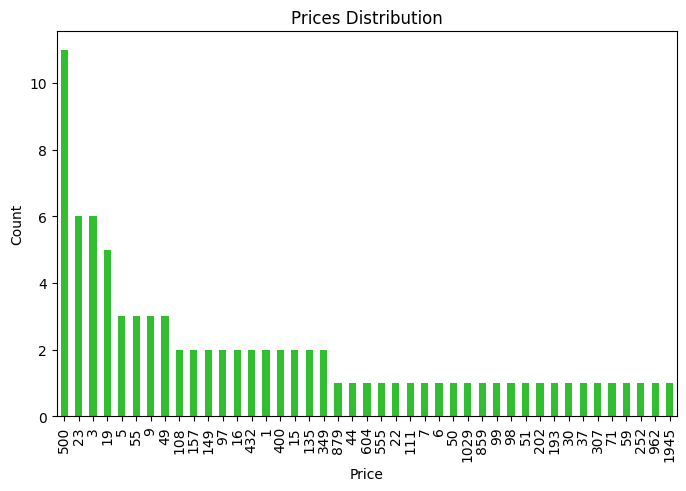

In [ ]:
price_plot=electronics['price'].value_counts().plot(kind='bar', color='#31bf31', figsize=(8,5), title='Prices Distribution')
price_plot.set_xlabel('Price')
price_plot.set_ylabel('Count');

In [ ]:
electronics['price'].min()

1

In [ ]:
electronics['price'].max()

1945

In [ ]:
electronics['title'].value_counts().head(8)

,count
title,
Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,12
產品 1,6
For iPhone 16 15 Plus 14 13 12 X Pro Max Shockproof Cover Phone Case Cinnamoroll,5
無線藍牙耳機,5
Metallor Smartphone Guitar Capo Phone Mount Learning & Playing Guitars,4
For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet Case Flip Card Holder Cover,3
AirPods 2nd Generation with Charging Case - White,3
SKOWER 42Wh WDX0R Battery For Dell Inspiron 13 5378 5368 7378 5568 15 5567 WDXOR,2


In [ ]:
titles=electronics['title']
titles

,title
0,Premium Wireless Earbuds - Miami Edition
1,AirPods 2nd Generation with Charging Case - White
2,Premium Wireless Earbuds - Miami Edition
3,AirPods 2nd Generation with Charging Case - White
4,Radiator Cooling Fan Assembly for BMW 3 Series...
...,...
81,產品 1
82,產品 1
83,無線藍牙耳機
84,Metallor Smartphone Guitar Capo Phone Mount L...


In [ ]:
titles=titles.value_counts()
titles

,count
title,
Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,12
產品 1,6
For iPhone 16 15 Plus 14 13 12 X Pro Max Shockproof Cover Phone Case Cinnamoroll,5
無線藍牙耳機,5
Metallor Smartphone Guitar Capo Phone Mount Learning & Playing Guitars,4
For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet Case Flip Card Holder Cover,3
AirPods 2nd Generation with Charging Case - White,3
SKOWER 42Wh WDX0R Battery For Dell Inspiron 13 5378 5368 7378 5568 15 5567 WDXOR,2
MacBook Pro 512GB,2


In [ ]:
titles=titles.reset_index()
titles

,title,count
0,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,12
1,產品 1,6
2,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,5
3,無線藍牙耳機,5
4,Metallor Smartphone Guitar Capo Phone Mount L...,4
5,For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet...,3
6,AirPods 2nd Generation with Charging Case - White,3
7,SKOWER 42Wh WDX0R Battery For Dell Inspiron 13...,2
8,MacBook Pro 512GB,2
9,Premium Wireless Earbuds - Miami Edition,2


In [ ]:
titles=titles[titles['count']>=3]
titles

,title,count
0,Apple MacBook Pro MB990LL/A 13.3 in. Notebook NEW,12
1,產品 1,6
2,For iPhone 16 15 Plus 14 13 12 X Pro Max Shock...,5
3,無線藍牙耳機,5
4,Metallor Smartphone Guitar Capo Phone Mount L...,4
5,For iPhone 8 7 Plus X Xs Max XRCASE ME Wallet...,3
6,AirPods 2nd Generation with Charging Case - White,3


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 28961 (\N{CJK UNIFIED IDEOGRAPH-7121}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34253 (\N{CJK UNIFIED IDEOGRAPH-85CD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph

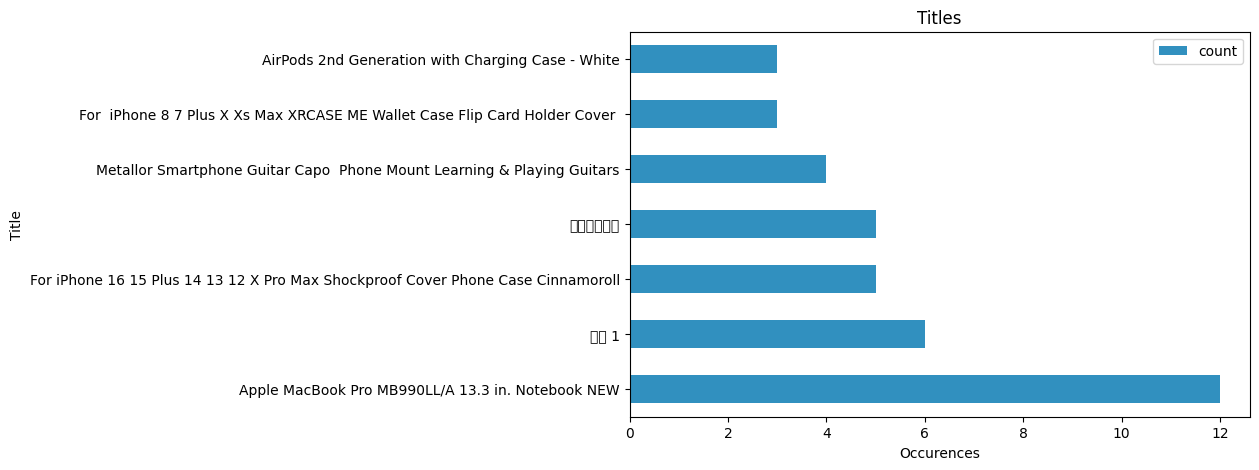

In [ ]:
title_plot=titles.plot(x='title', y='count',kind='barh', color='#3190bf', figsize=(8,5), title='Titles')
title_plot.set_xlabel('Occurences')
title_plot.set_ylabel('Title');